# Delivery_time -> Predict delivery time using sorting time


In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels as smf

In [26]:
dataset = pd.read_csv('delivery_time.csv')

In [27]:
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [28]:
dataset_1 = dataset.rename({'Delivery Time': 'Delivery_time','Sorting Time':'Sorting_time'},axis=1)

In [29]:
dataset_1

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [30]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_time  21 non-null     float64
 1   Sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


C:\Users\Saif Siddiqui\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_time', ylabel='Density'>

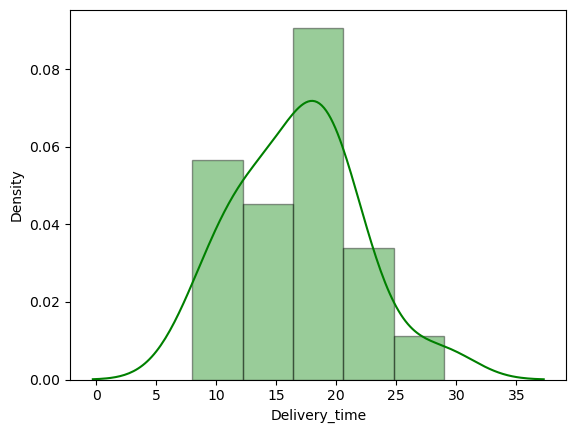

In [31]:
import seaborn as sns 
sns.distplot(dataset_1['Delivery_time'],color='green',hist_kws=dict(edgecolor = 'black'))

C:\Users\Saif Siddiqui\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting_time', ylabel='Density'>

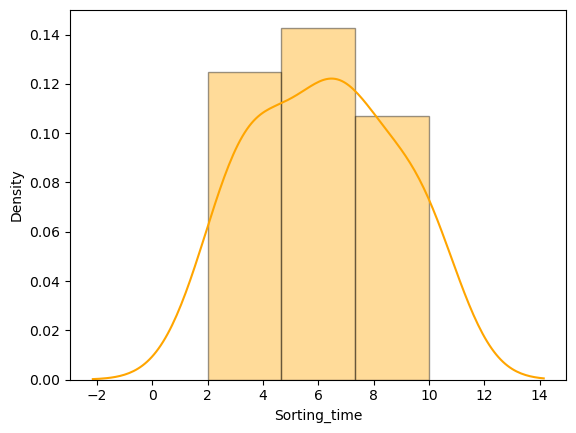

In [32]:
import seaborn as sns
sns.distplot(dataset_1['Sorting_time'],color='orange',hist_kws=dict(edgecolor = 'black'))

In [33]:
dataset_1['Delivery_time'].describe()

count    21.000000
mean     16.790952
std       5.074901
min       8.000000
25%      13.500000
50%      17.830000
75%      19.750000
max      29.000000
Name: Delivery_time, dtype: float64

<AxesSubplot:>

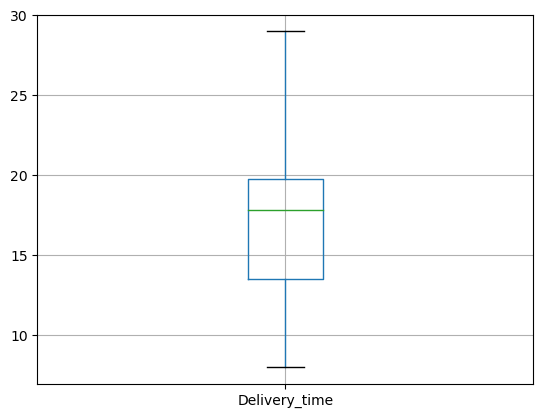

In [34]:
dataset_1.boxplot(column= ['Delivery_time'])

<AxesSubplot:>

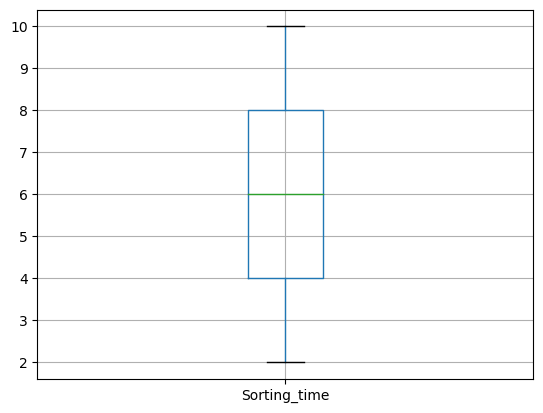

In [35]:
dataset_1.boxplot(column = ['Sorting_time'])

In [36]:
dataset_1.corr()

,Delivery_time,Sorting_time
Delivery_time,1.000000,0.825997
Sorting_time,0.825997,1.000000


In [37]:
import statsmodels.formula.api as smf
model = smf.ols("Delivery_time~Sorting_time",data=dataset_1).fit()

<AxesSubplot:xlabel='Sorting_time', ylabel='Delivery_time'>

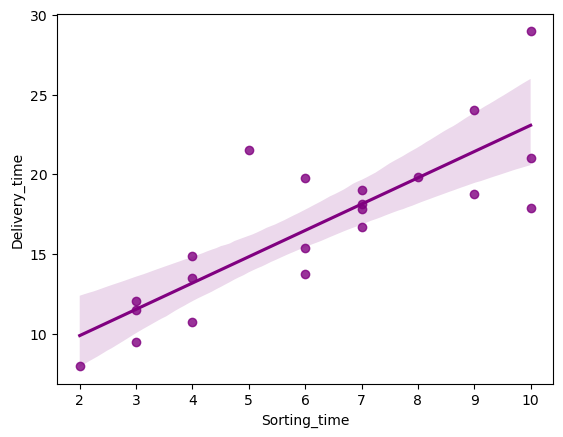

In [38]:
sns.regplot(x="Sorting_time",y="Delivery_time",data=dataset_1,color='purple')

In [39]:
model.params

Intercept       6.582734
Sorting_time    1.649020
dtype: float64

In [40]:
model.tvalues , model.pvalues

(Intercept       3.823349
 Sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 Sorting_time    0.000004
 dtype: float64)

In [41]:
model.rsquared

0.6822714748417231

In [42]:
model.rsquared_adj

0.6655489208860244

In [43]:
#assuming sorting time as 7
Delivery_time =  6.582734 + 1.649020*(7)

In [44]:
Delivery_time

18.125874

In [45]:
#predicting for 10,15,20,30 sorting_time
newdata=pd.Series([10,15,20,30])

In [46]:
data_pred = pd.DataFrame(newdata,columns=['Sorting_time'])

In [47]:
data_pred

,Sorting_time
0,10
1,15
2,20
3,30


In [48]:
model.predict(data_pred)

0    23.072933
1    31.318032
2    39.563132
3    56.053331
dtype: float64